In [113]:
from IPython.display import clear_output
import time
import PIL.Image

%run ./generator.ipynb

In [79]:
ref = cv2.imread(os.path.join(DATASETS_ROOT,"atlas/ref_img.png"), cv2.IMREAD_GRAYSCALE)
diatom_images_train, diatom_images_val = split_img_list(list_images(DATASET_PATH, diatoms=True, ref=ref), PERCENTAGE_VAL)
debris_images_train, debris_images_val = split_img_list(list_images(DATASET_DUST_PATH, diatoms=False, ref=ref), PERCENTAGE_VAL)

3.1036458015441895 s!


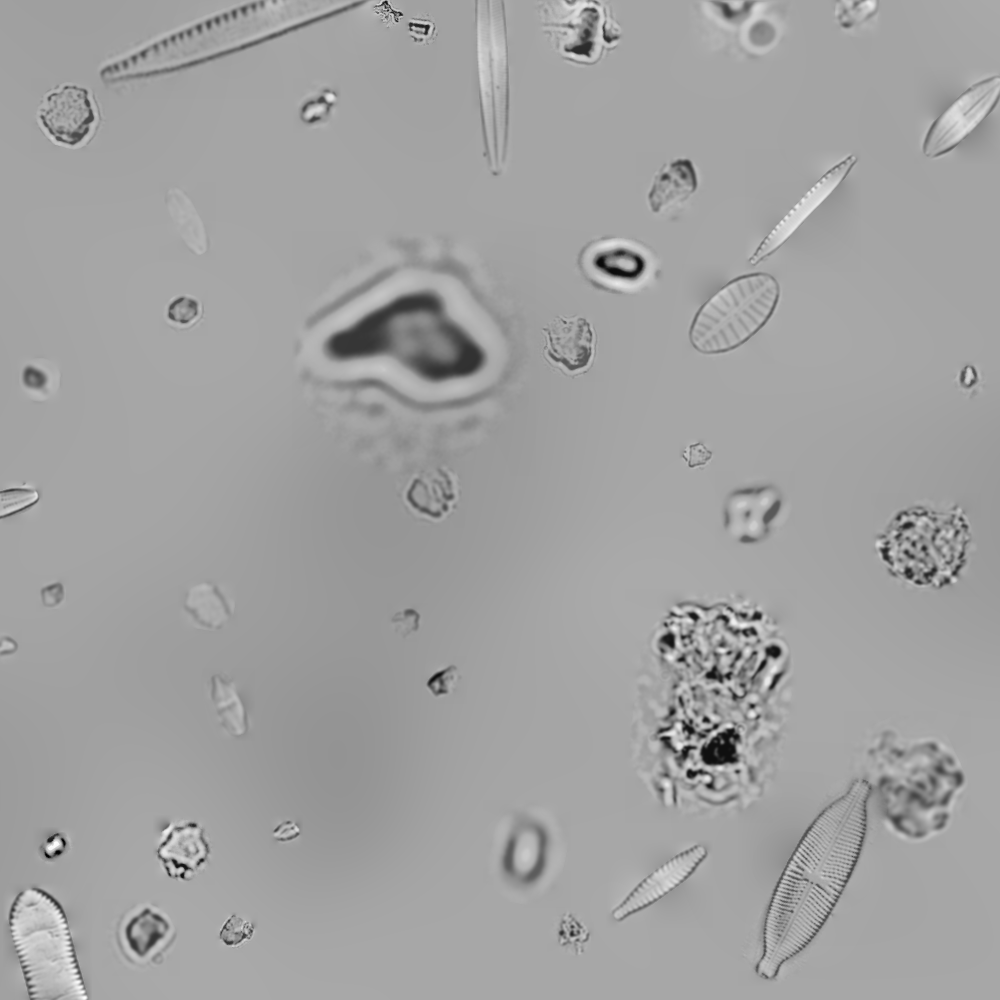

In [188]:
%run ./generator.ipynb
start=time.time()
np.random.seed()
final_image, annotations = main_generator([diatom_images_train, debris_images_train],
                                          simple_angles = False, 
                                          size_px = 1000,
                                          verbose=False, 
                                          overlapping=0.4, 
                                          n_diatoms=[9,12],
                                          scale_diatoms=[3.3,3],                                          
                                          n_dust=[20,40],
                                          scale_dust=[3,4])
print(time.time()-start, "s!")
display(Image.fromarray(final_image))

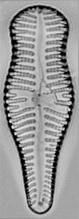

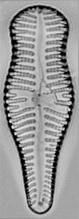

In [177]:
display(Image.fromarray(ref))
ref2 = (1*(ref-np.median(ref))+np.median(ref)).astype("uint8")
display(Image.fromarray(ref2))